# HR Dataset - Statistics Review

## Explore the data

The data set we will use for this exercise comes from a Kaggle challenge and is often used for predictive analytics, namely to predict why the best and most experienced employees tend to leave the company.  We won't be using it for any predictive purposes here, but will instead use this data set to review many of the concepts explored in the Statistical Inference lectures.

This data contains fields for various measures of employee performance and reported satisfaction levels, as well as categorical variables for events and salary level.  For now, just explore the data a bit to get a general idea of what is going on.

In [2]:
import pandas as pd
HR_data = pd.read_csv('HR_comma_sep.csv')

In [5]:
print(HR_data.info())
print(HR_data.describe())
HR_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000      

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Probability, Expectation Values, and Variance

The concepts of probability, expectation values, and variance are the bedrock of statistical inference.  Let's begin by employing these concepts to see if we can find interesting paths to go down which may provide insight into the inner workings of this company.

1. What is the probability that a randomly selected employee left the company?  What about experienced a work accident?  Also, compute the probability that a randomly selected employee left the company and experienced a work accident.
1. Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company.  Compare these results to the same percentiles for those that did not leave.  What can you say about the results?
1. Compute the variance and standard deviation of hours worked.
1. Compare the variance between the satisfaction levels of employees who left versus those who stayed.  Which is larger?  What does this mean?
1. Compute the mean satisfaction level for each salary category.  Comment on your results.
1. Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups.  In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$
1. What can you say about your results in part 6?
1. Repeat parts 6 and 7 for 
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$
1. What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee?  Comment on your results.
1. Suppose we were to pull 50 random samples of employee satisfaction levels.  What would approximately be the mean of this sample?  What would be the mean of, say, 10 sets of random samples?  Demonstrate your assertions by writing Python code to do just that.


In [178]:
% matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

### Question 1
What is the probability that a randomly selected employee left the company? What about experienced a work accident? Also, compute the probability that a randomly selected employee left the company and experienced a work accident.

In [7]:
# random employee left the company
prob_left = HR_data['left'][HR_data['left'] == 1].count() / HR_data['left'].count()
print(prob_left)

0.238082538836


In [8]:
# random employee experienced a work accident
prob_accident = HR_data['Work_accident'][HR_data['Work_accident'] == 1].count() / HR_data['Work_accident'].count()
print(prob_accident)

0.144609640643


In [9]:
# random employee left and experienced an accident
prob_left_accident = HR_data['Work_accident'][(HR_data['Work_accident'] == 1) & (HR_data['left'] == 1)].count() / HR_data['Work_accident'].count()
print(prob_left_accident)

0.0112674178279


### Question 2
Compute the 25th, 50th, and 90th percentiles for the satisfaction level score for all employees that left the company. Compare these results to the same percentiles for those that did not leave. What can you say about the results?

In [10]:
employees_who_left = HR_data['satisfaction_level'][HR_data['left'] == 1]
employees_who_stayed = HR_data['satisfaction_level'][HR_data['left'] == 0]

def print_quantiles(df, s):
    quantiles = ['.25', '.50', '.90']
    for quant in quantiles:
        print("%sth quantile of %s: %s" % (quant[1:], s, df.quantile(float(quant))))

In [11]:
print_quantiles(employees_who_left, "employees who left")
print_quantiles(employees_who_stayed, "employees who stayed")

25th quantile of employees who left: 0.13
50th quantile of employees who left: 0.41
90th quantile of employees who left: 0.84
25th quantile of employees who stayed: 0.54
50th quantile of employees who stayed: 0.69
90th quantile of employees who stayed: 0.94


People who stayed have higher satisfaction levels

### Question 3
Compute the variance and standard deviation of hours worked.

In [3]:
HR_data['average_monthly_hours'] = HR_data['average_montly_hours']
HR_data.drop('average_montly_hours', axis=1, inplace=True)

In [13]:
print("Hourly variance: {}".format(np.var(HR_data['average_monthly_hours'])))
print("Hourly standard deviation: {}".format(np.std(HR_data['average_monthly_hours'])))

Hourly variance: 2494.1468761784163
Hourly standard deviation: 49.94143446256241


### Question 4.
Compare the variance between the satisfaction levels of employees who left versus those who stayed. Which is larger? What does this mean?

In [14]:
print("Variance of satisfaction of quitters: {}%".format(round(np.var(employees_who_left)* 100, 2)))
print("Variance of satisfaction of people who stayed on: {}%".format(round(np.var(employees_who_stayed) * 100, 2)))

Variance of satisfaction of quitters: 6.96%
Variance of satisfaction of people who stayed on: 4.71%


The satisfaction of quitters varied more. This makes sense as the quitters might have quit due to dissatisfaction or any other reason, increasing the spread of satisfaction. 

### Question 5
Compute the mean satisfaction level for each salary category. Comment on your results.

In [15]:
HR_data.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [16]:
def mean_happiness(df):
    salary_list = ['low', 'medium', 'high']
    for salary in salary_list:
        print("{} salary satisfaction: {}%".format(salary, round(HR_data['satisfaction_level'][HR_data['salary'] == salary].mean() * 100, 2)))

In [17]:
mean_happiness(HR_data)

low salary satisfaction: 60.08%
medium salary satisfaction: 62.18%
high salary satisfaction: 63.75%


The higher the salary, the more satisfied the employee

### Question 6
Given an employees salary level (low, medium, or high), calculate the probability that they worked more than two standard deviations of the average monthly hours across all groups. In other words, compute
$$P(hours > 2\sigma \vert salary ) = \dfrac{P(salary \vert hours > 2\sigma) P(hours > 2\sigma)}{P(salary)}$$

In [18]:
def q6(df):
    salary_list = ['low', 'medium', 'high']
    for salary in salary_list:
        df_std = df['average_monthly_hours'].std()
        df_mean = df['average_monthly_hours'].mean()
        two_sd = 2*df_std + df_mean
        total_count = df['salary'].count()
        
        prob_salary_hours = df['salary'][(df['salary'] == salary) & (df['average_monthly_hours'] > two_sd)].count() / df['salary'][df['average_monthly_hours'] > two_sd].count()
        prob_hours = df['average_monthly_hours'][df['average_monthly_hours'] > two_sd].count() / total_count
        prob_salary = df['salary'][df['salary'] == salary].count() / total_count
        total_prob = prob_salary_hours * prob_hours / prob_salary
        print("""probability that a {} salary employee worked more than 2 standard 
deviations of the average monthly hours across all groups: {}%""".format(salary, round(total_prob * 100, 4)))

In [19]:
q6(HR_data)

probability that a low salary employee worked more than 2 standard 
deviations of the average monthly hours across all groups: 1.3532%
probability that a medium salary employee worked more than 2 standard 
deviations of the average monthly hours across all groups: 0.8998%
probability that a high salary employee worked more than 2 standard 
deviations of the average monthly hours across all groups: 0.1617%


### Question 7
What can you say about your results in part 6?

higher salaried employees have a lower probability of working extra

### Question 8
Repeat parts 6 and 7 for:
$$P(left \vert salary ) = \dfrac{P(salary \vert left) P(left)}{P(salary)}$$

In [20]:
def quitter_salaries(df):
    total_count = len(df)
    prob_left = df.left[df['left'] == 1].count() / total_count
    salary_list = ['low', 'medium', 'high']
    for salary in salary_list:
        prob_salary = df.salary[df['salary'] == salary].count() / total_count
        prob_left_salary = df.salary[(df['salary'] == salary) & (df['left'] == 1)].count() / total_count
        prob_total = prob_left_salary * prob_left / prob_salary
        print("Probability that a {} salary employee will leave: {}%".format(salary, round(prob_total * 100, 2)))

In [21]:
quitter_salaries(HR_data)

Probability that a low salary employee will leave: 7.07%
Probability that a medium salary employee will leave: 4.86%
Probability that a high salary employee will leave: 1.58%


### Question 9
What is the odds ratio of an employee with a high salary getting a promotion within the past five years versus a low salary employee? Comment on your results.

In [22]:
high_sal_promo = HR_data[(HR_data.salary == 'high') & (HR_data.promotion_last_5years == 1)].salary.count()
low_sal_promo = HR_data[(HR_data.salary == 'low') & (HR_data.promotion_last_5years == 1)].salary.count()
print(round(high_sal_promo/low_sal_promo, 2))

1.09


More employees with high salaries have recieved promotions in the past 5 years

### Question 10
Suppose we were to pull 50 random samples of employee satisfaction levels. What would approximately be the mean of this sample? What would be the mean of, say, 10 sets of random samples? Demonstrate your assertions by writing Python code to do just that.

Around 60% from the satisfaction results of question 6. The results will get more representative of the population the more sets are taken

In [23]:
def random_samples(df, sets):
    samples = sets * 50
    print(df.satisfaction_level.sample(n=samples).mean())

In [24]:
random_samples(HR_data, 1)

0.5750000000000002


In [25]:
random_samples(HR_data, 10)

0.6200200000000011


## Distributions and The Central Limit Theorem
### The Bernoulli Distribution
Bernoulli distributions are the result of a random variable with a binary outcome, like a coin clip or medical test giving a positive or negative result.  Typically, we represent the outcomes of a Bernoulli Random variable $X$ of only taking values of 0 or 1, with probabilities $p$ and $1 - p$ respectively, mean $p$, variance $p(1 - p)$, and PMF given by 
$$ P(X = x) = p^x (1 - p)^{1 - x} $$
Bernoulli random variables crop up very often in statistical analysis, most often in the form of Binomial trials, or, as a sum of independent Bernoulli variables with PMF given by 
$$ P(X = x) = {n \choose x} p^x (1 - p)^{n - x} $$
where
$$ {n \choose x} = \frac{n!}{x!(n - x)!} $$
In this exercise you'll take a look at the HR data and apply these concepts to gain insight.

Using the HR data, answer the following.
1. Which variables in the HR data can be said to be Bernoulli random variables?
2. For the k variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x = 1)$ result.
3. Compute the variance of each of the variables in part 2 using $p_k$ as described above.
4. For each of the k variables, compute the probability of randomly selecting exactly 3500 employees with a positive result.  Comment on your answer.
5. For each of the k variables, compute the probability of randomly selecting at 3500 **or less** with a positive result.  Comment on your answer.
6. Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables.  Comment on your results.

In [26]:
HR_data.head(2)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_monthly_hours
0,0.38,0.53,2,3,0,1,0,sales,low,157
1,0.80,0.86,5,6,0,1,0,sales,medium,262


### Question 1
Which variables in the HR data can be said to be Bernoulli random variables?

Work accident, left, promotion_last_5years

### Question 2
For the k variables you identified in part 1, compute the probabilities $p_k$, of each having a positive $(x=1)$ result.

In [27]:
bernoulli_vars = ['Work_accident', 'left', 'promotion_last_5years']
for var in bernoulli_vars:
    total = len(HR_data)
    print("pk for {}: {}".format(var, HR_data[var][HR_data[var] == 1].count() / total))

pk for Work_accident: 0.1446096406427095
pk for left: 0.2380825388359224
pk for promotion_last_5years: 0.021268084538969265


### Question 3
Compute the variance of each of the variables in part 2 using  pkpk  as described above.

In [28]:
for var in bernoulli_vars:
    total = len(HR_data)
    print("Variance for {}: {}".format(var, np.var(HR_data[var])))

Variance for Work_accident: 0.12369769247585938
Variance for left: 0.18139924353741813
Variance for promotion_last_5years: 0.0208157531190111


### Question 4
For each of the k variables, compute the probability of randomly selecting exactly 3500 employees with a positive result. Comment on your answer.

In [4]:
import scipy.stats as stats

In [75]:
for var in bernoulli_vars:
    dist = stats.binom(n=len(HR_data), p=HR_data[var].mean())
    prob = dist.pmf(3500)
    print(var, prob)

Work_accident 3.34945337164e-183
left 0.00303661929626
promotion_last_5years 0.0


### Question 5
For each of the k variables, compute the probability of randomly selecting at 3500 or less with a positive result. Comment on your answer.

In [78]:
for var in bernoulli_vars:
    dist = stats.binom(n=len(HR_data), p=HR_data[var].mean())
    prob = dist.cdf(3500)
    print(var, prob)

Work_accident 1.0
left 0.0880311810433
promotion_last_5years 1.0


### Question 6
Now plot both the PMF and CDF as a function of the number of drawn samples for each of the k variables. Comment on your results.

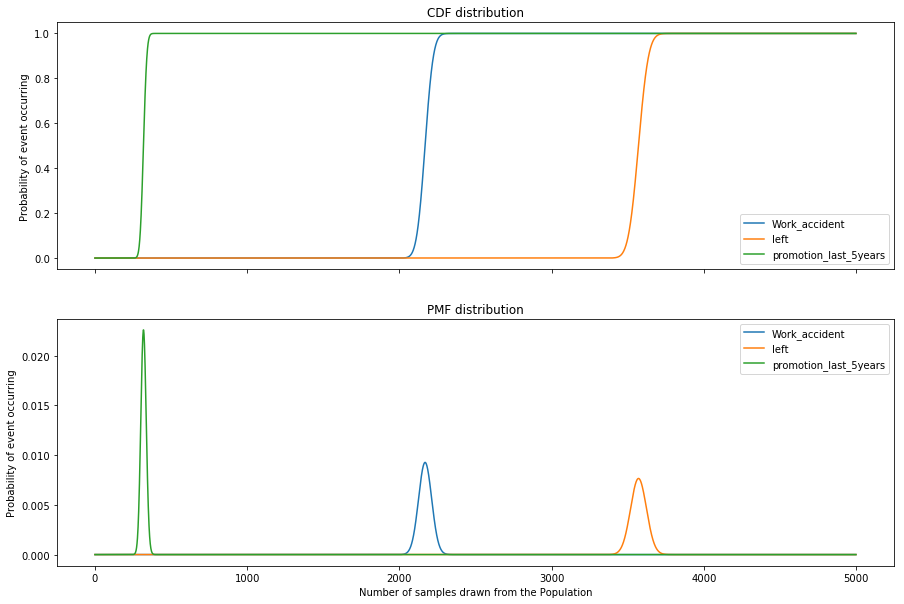

In [115]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(15,10))
for plot_type in range(2):
    for var in bernoulli_vars:
        dist = stats.binom(n=len(HR_data), p=HR_data[var].mean())
        binom_list = []
        if plot_type == 0:
            [binom_list.append(dist.cdf(k)) for k in range(5000)]
            axes[plot_type].set_title('CDF distribution')
        else:
            [binom_list.append(dist.pmf(k)) for k in range(5000)]
            axes[plot_type].set_title('PMF distribution')
        axes[plot_type].plot(binom_list, label=var)
        axes[plot_type].legend()
        axes[plot_type].set_ylabel("Probability of event occurring")
plt.xlabel("Number of samples drawn from the Population")
plt.show()

### The Normal Distribution
The Normal distribution (or sometimes called the Bell Curve or Guassian) is by far the most prevalent and useful distribution in any field that utilizes statistical techniques.  In fact, it can be shown that the means of random variables sampled from **any** distribution eventually form a normal given a sufficiently large sample size.

A normal distribution is characterized by the PDF given by
$$p(x|\mu,\sigma) = \frac{1}{\sqrt{(2\pi\sigma^2)}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

where $\mu$ is the mean and $\sigma^2$ is the variance, thus the distribution is characterized by mean and variance alone.  In this exercise, you'll examine variables in the HR dataset and construct normals approximating them.

Using the HR data, answer the following

1. Which variables may be approximately normal?
1. For the variables in part 1, plot histograms.
1. Compute the mean and variance for each of the variables used in parts 1 and 2.
1. Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part 1.  Are they well approximated by normals?

#### Question 1
Which variables may be approximately normal?

In [5]:
HR_data.describe()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,average_monthly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,3.498233,0.144610,0.238083,0.021268,201.050337
std,0.248631,0.171169,1.232592,1.460136,0.351719,0.425924,0.144281,49.943099
min,0.090000,0.360000,2.000000,2.000000,0.000000,0.000000,0.000000,96.000000
25%,0.440000,0.560000,3.000000,3.000000,0.000000,0.000000,0.000000,156.000000
50%,0.640000,0.720000,4.000000,3.000000,0.000000,0.000000,0.000000,200.000000
75%,0.820000,0.870000,5.000000,4.000000,0.000000,0.000000,0.000000,245.000000
max,1.000000,1.000000,7.000000,10.000000,1.000000,1.000000,1.000000,310.000000


Satisfaction level, last evaluation, average_monthly_hours

#### Question 2
For the variables in part 1, plot histograms.

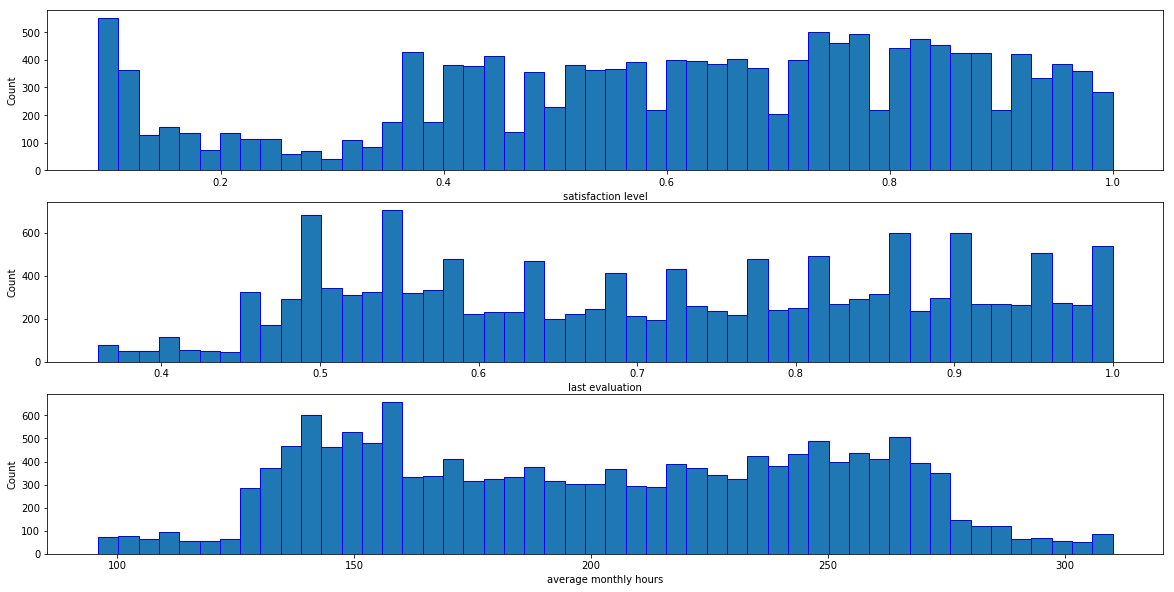

In [309]:
fig, ax = plt.subplots(3, 1, figsize=(20,10))
column_list = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
for plot, column in zip(ax, column_list):
    # binned satisfaction levels of each column
    plot.hist(HR_data[column], bins=50, edgecolor='b')
    plot.set_ylabel('Count')
    plot.set_xlabel(column.replace('_', ' '))
plt.show()

#### Question 3
Compute the mean and variance for each of the variables used in parts 1 and 2.

In [11]:
for column in column_list:
    print("Mean of {}: {}".format(column, HR_data[column].mean()))
    print("Variance of {}: {}".format(column, HR_data[column].var()))

Mean of satisfaction_level: 0.6128335222348166
Variance of satisfaction_level: 0.061817200647087255
Mean of last_evaluation: 0.7161017401159978
Variance of last_evaluation: 0.02929886443156327
Mean of average_monthly_hours: 201.0503366891126
Variance of average_monthly_hours: 2494.313174809979


#### Question 4
Using the mean and variance in part 3, construct normal distributions for each and overlay them on top of the histograms you made in part 1. Are they well approximated by normals?

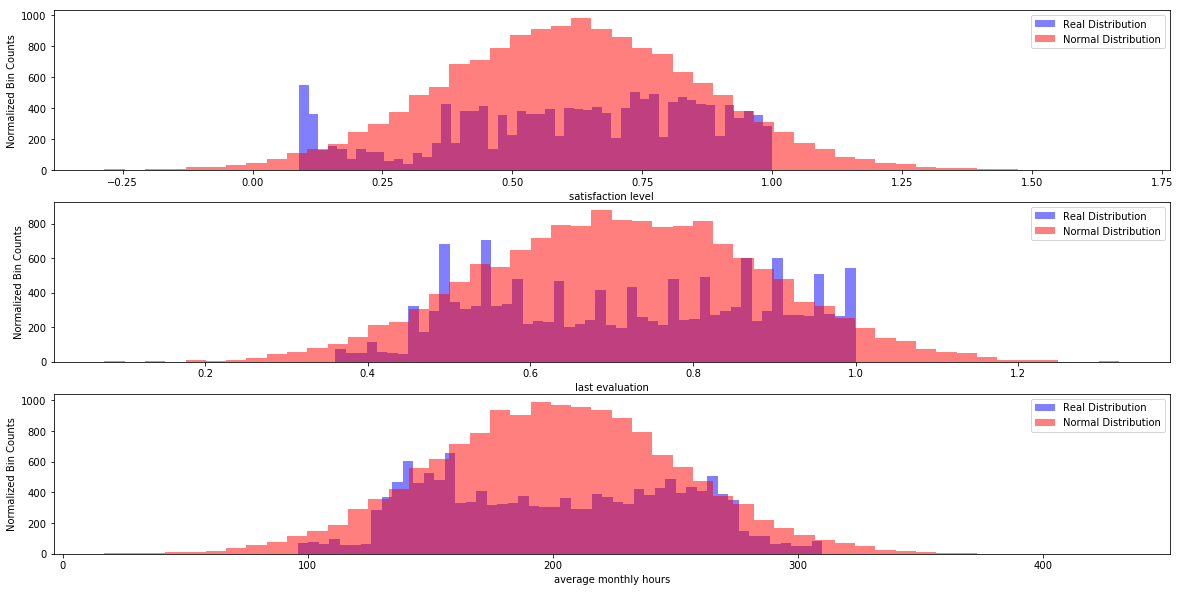

In [194]:
fig, ax = plt.subplots(3,1, figsize=(20,10))
column_list = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours']
for plot, name in zip(ax, column_list):
    # iterates through the subplots and the columns, and graphs the normal distribution and actual distribution for each
    # column on each subplot
    weights = np.ones_like(HR_data[name]/len(HR_data[name]))
    plot.hist(HR_data[name], bins=50, weights=weights, color='b', alpha=0.5, label='Real Distribution')
    plot.hist(np.random.normal(loc=HR_data[name].mean(), scale=HR_data[name].std(), size=len(HR_data[name])), 
               weights=weights, bins=50, color='r', alpha=0.5, label="Normal Distribution")
    plot.set_ylabel("Normalized Bin Counts")
    plot.set_xlabel(name.replace("_", ' '))
    plot.legend()
plt.show()

### The Poisson Distribution
The Poisson distribution is very versatile but is typically used to model counts, such as, the amount of clicks per advertisement and arriving flights per unit time.  It has a PDF given by
$$ P(X = x, \lambda) = \frac{\lambda^x e^{-\lambda}}{x!} $$
where the mean and variance are both equal to $\lambda$

Using the HR data, answer the following.

1. What variables would be good candidates for modeling with a Poisson distribution?
1. For each variable in part 1, divide each by salary and fit a Poisson distribution to each.
1. Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2.  Comment on your results.

#### Question 1
What variables would be good candidates for modeling with a Poisson distribution?

Project number, Time spent with the company

#### Question 2
For each variable in part 1, divide each by salary and fit a Poisson distribution to each.

In [129]:
for salary in salaries:
    # mean time spent with the company based on poisson distribution for each salary bracket
    tsc = HR_data[HR_data['salary'] == salary].time_spend_company
    dist_t = stats.poisson(mu=tsc.mean())
    print("Mean time spent with company for people with {} salaries: {}".format(salary, round(dist_t.mean(), 2)))
    
    # mean number of projects based on poisson distribution for each salary bracket
    np = HR_data[HR_data['salary'] == salary].number_project
    dist_n = stats.poisson(mu=np.mean())
    print("Mean number of projects for people with {} salaries: {}".format(salary, round(dist_n.mean(), 2)))

Mean time spent with company for people with low salaries: 3.44
Mean number of projects for people with low salaries: 3.8
Mean time spent with company for people with medium salaries: 3.53
Mean number of projects for people with medium salaries: 3.81
Mean time spent with company for people with high salaries: 3.69
Mean number of projects for people with high salaries: 3.77


#### Question 3
Compute the probability of obtaining at least the mean of all salary levels in each category by using the Poisson distributions you constructed in part 2. Comment on your results.

In [138]:
for salary in salaries:
    # poisson distribution of the employee's time spent with the company for each salary bracket
    tsc = HR_data[HR_data['salary'] == salary].time_spend_company
    dist_t = stats.poisson(mu=tsc.mean())
    prob1 = dist_t.cdf(tsc.mean())
    print("Probability that a person with a {} salary has spent {} \
          years with the company: {}".format(salary, round(tsc.mean(), 2), round(prob1, 4)))
    
    # poisson distribution of the number of projects an employee has for each salary bracket
    np = HR_data[HR_data['salary'] == salary].number_project
    dist_n = stats.poisson(mu=np.mean())
    prob2 = dist_n.cdf(np.mean())
    print("Probability that a person with a {} salary has {} \
          projects: {}".format(salary, round(np.mean(), 2), round(prob2, 4)))

Probability that a person with a low salary has spent 3.44 years with the company: 0.55
Probability that a person with a low salary has 3.8 projects: 0.4735
Probability that a person with a medium salary has spent 3.53 years with the company: 0.5304
Probability that a person with a medium salary has 3.81 projects: 0.4707
Probability that a person with a high salary has spent 3.69 years with the company: 0.4957
Probability that a person with a high salary has 3.77 projects: 0.4802


### The Central Limit Theorem
The Central Limit Theorem is perhaps one of the most remarkable results in statistics and mathematics in general.  In short, it says that the distribution of means of independent random variables, sampled from **any** distribution, tends to approach a normal distribution as the sample size increases.

An example of this would be taking a pair of dice, rolling them, and recording the mean of each result.  The Central Limit Theorem states, that after enough rolls, the distribution of the means will be approximately normal.  Stated formally, the result is
    $$ \bar{X_n} \approx N(\mu, \sigma^2/n) = \frac{\bar{X_n} - \mu}{\sigma \sqrt{n}}$$
In this exercise, you'll conduct simulation experiments to explore this idea.

Using the HR data, answer the following.
1. Choose two variables which may be good candidates to test this theorem.
1. Using the variables chosen in part 1, randomly select a set of `n = 10` samples and take the mean.  Repeat this 1000 times for each variable.
1. Plot a histogram for each variable used in part 2.  Comment on your results.
1. Repeat parts 2-3 for `n = 100`, `n = 500`, and `n = 1000`.  Comment on your results.
1. Overlay a normal curve on your `n = 1000` plots, using the mean and variance computed from the data.  Comment on your results.

#### Question 1
Choose two variables which may be good candidates to test this theorem.

In [139]:
HR_data.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,average_monthly_hours
0,0.38,0.53,2,3,0,1,0,sales,low,157
1,0.80,0.86,5,6,0,1,0,sales,medium,262
2,0.11,0.88,7,4,0,1,0,sales,medium,272
3,0.72,0.87,5,5,0,1,0,sales,low,223
4,0.37,0.52,2,3,0,1,0,sales,low,159


In [140]:
norm_columns = HR_data[['satisfaction_level', 'number_project']]

#### Question 2
Using the variables chosen in part 1, randomly select a set of n = 10 samples and take the mean. Repeat this 1000 times for each variable.

In [141]:
norm_means = {}
for col in norm_columns:
    norm_means[col] = [norm_columns[col].sample(10).mean() for i in range(1000)]

#### Question 3
Plot a histogram for each variable used in part 2. Comment on your results.

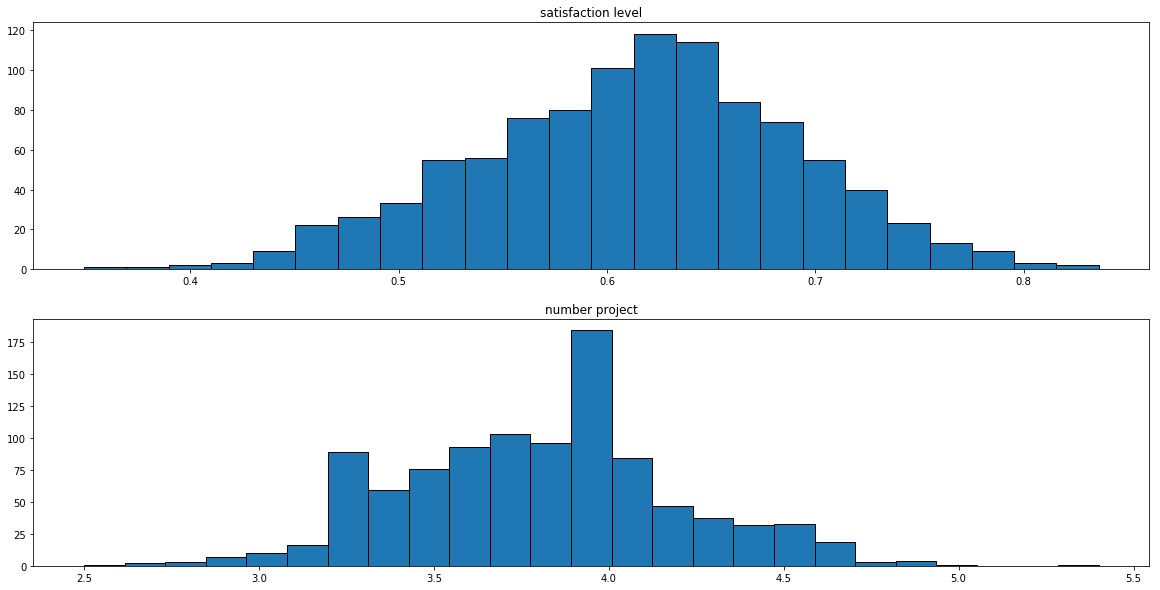

In [150]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
for plot, col in zip(ax, norm_means):
    plot.hist(norm_means[col], bins='auto', edgecolor='black')
    plot.set_title(col.replace('_', ' '))
plt.show()

Satisfaction level has a normal distribution, where project number does not

#### Question 4
Repeat parts 2-3 for n = 100, n = 500, and n = 1000. Comment on your results.

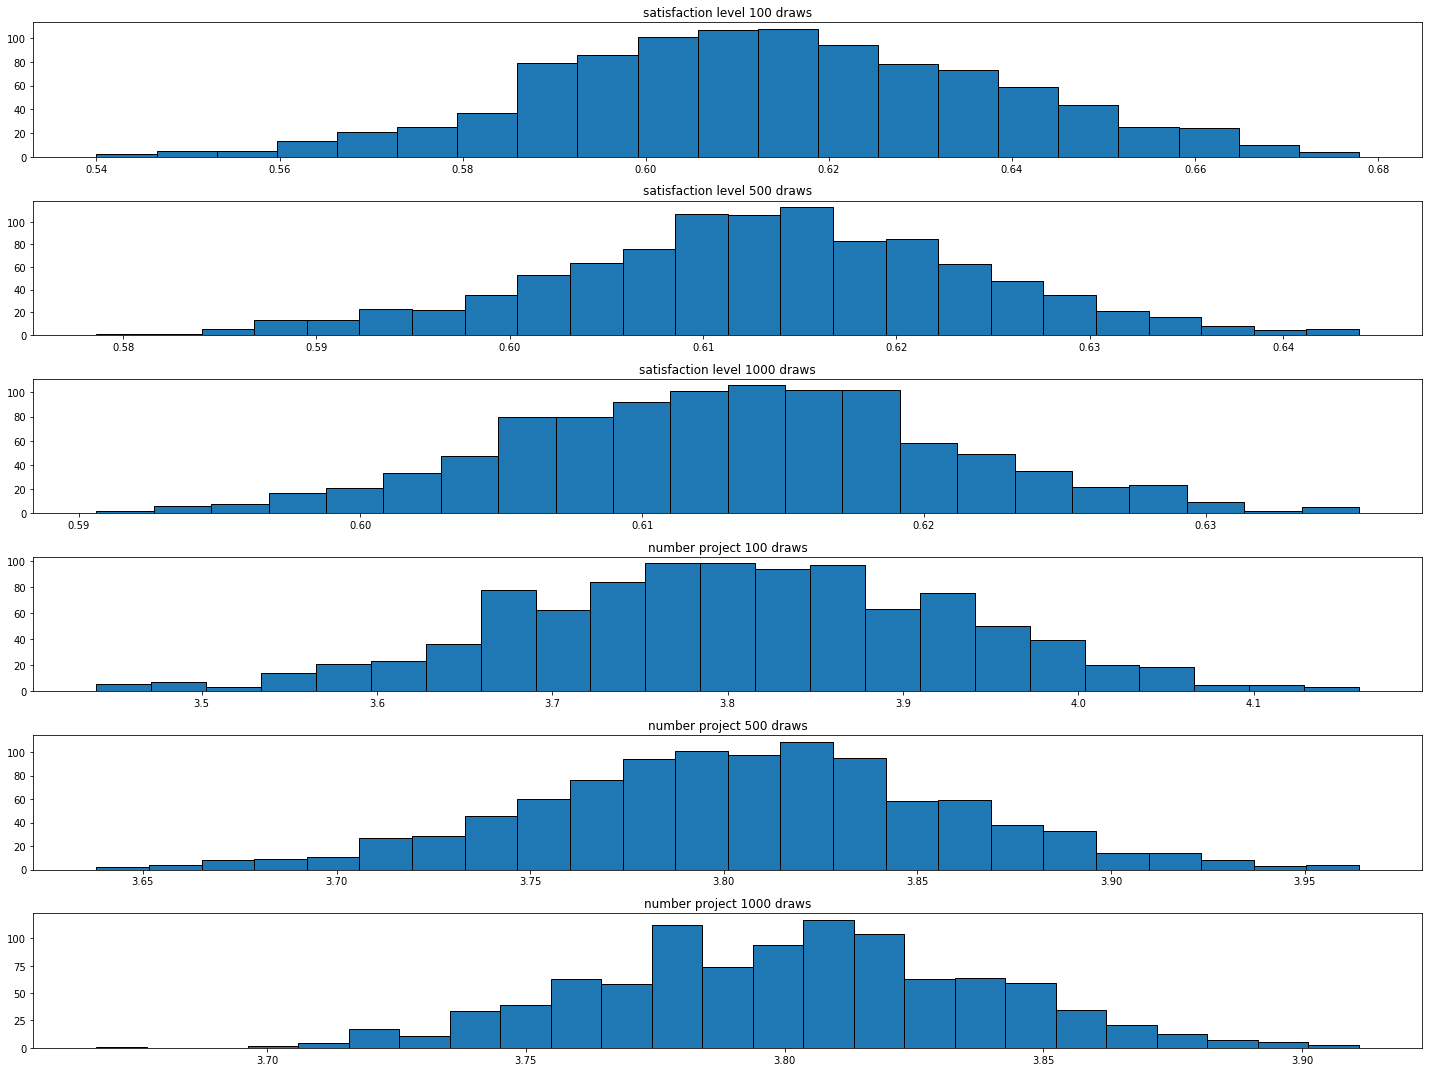

In [158]:
# generating the normal distributions for different random sampling sizes
norm_means2 = {}
samples = [100, 500, 1000]
for col in norm_columns:
    for n in samples:
        key_name = col + '_' + str(n) + '_draws'
        norm_means2[key_name] = [norm_columns[col].sample(n).mean() for i in range(1000)]

# plotting the normal distributions
fig, ax = plt.subplots(6, figsize=(20,15))
for plot, key in zip(ax, norm_means2):
    plot.hist(norm_means2[key], bins='auto', edgecolor='black')
    plot.set_title(key.replace('_', ' '))
plt.tight_layout()
plt.show()  

Generally distributions become more normal as sampling size increases (consistent with the central limit theorem)

#### Question 5
Overlay a normal curve on your n = 1000 plots, using the mean and variance computed from the data. Comment on your results.

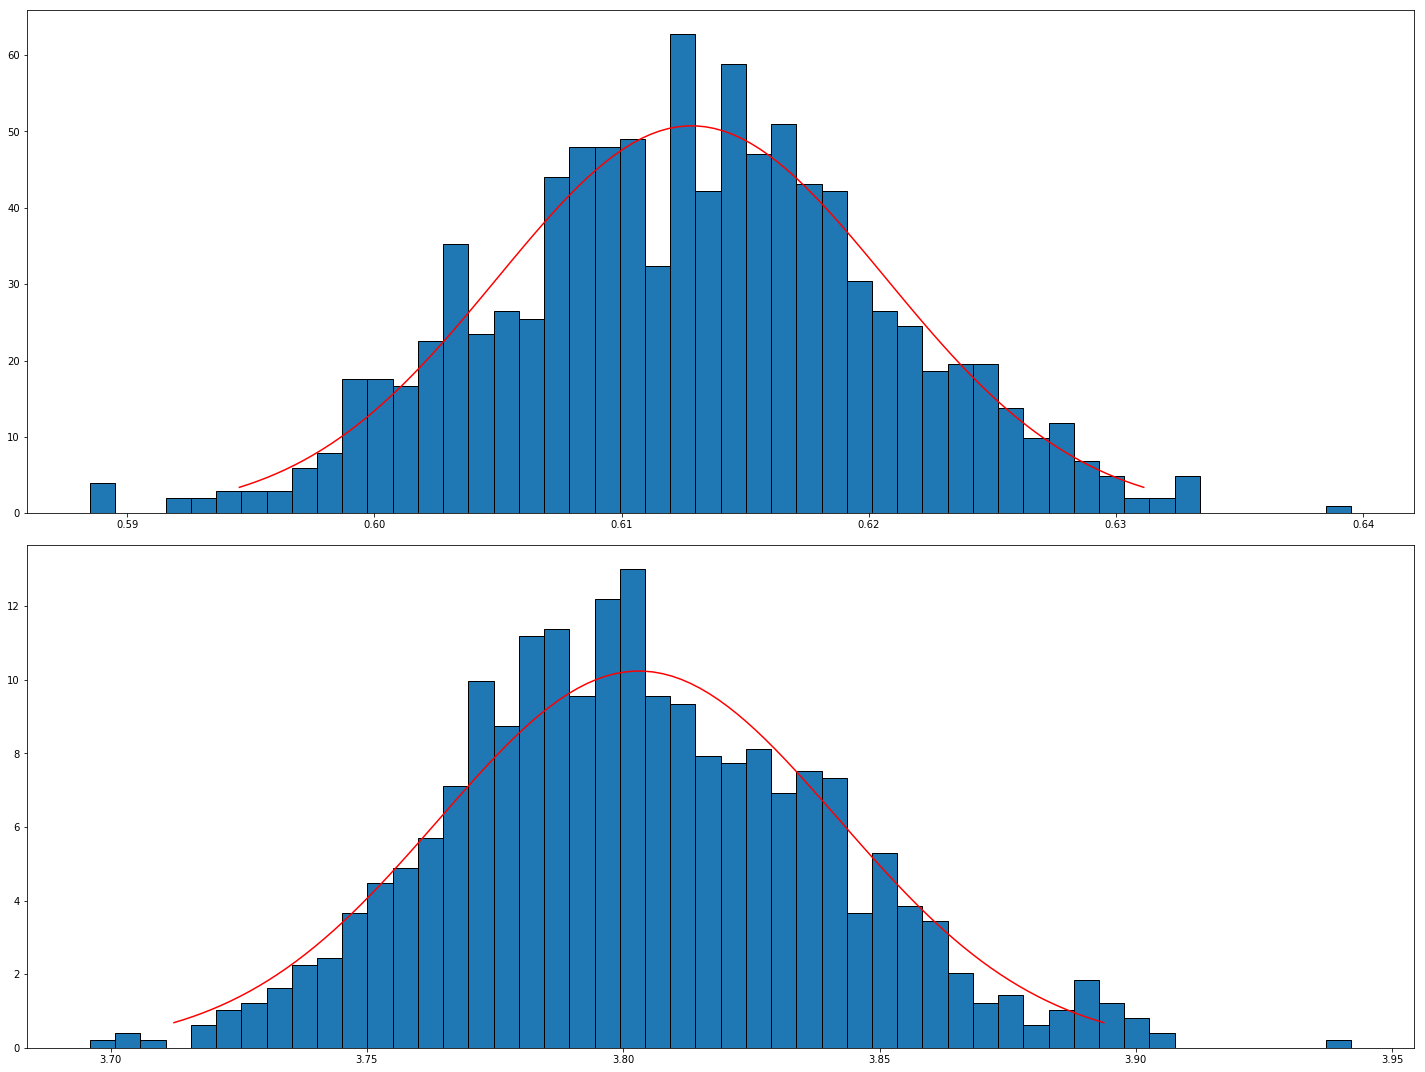

In [208]:
norm_means3 = {}
norm_var3 = {}
for col in norm_columns:
    key_name = col + '_' + str(n) + '_draws'
    norm_means3[key_name] = [norm_columns[col].sample(1000).mean() for i in range(1000)]

fig, ax = plt.subplots(2, 1, figsize=(20,15))
plt.tight_layout()
for plot, key, HR_col in zip(ax, norm_means3, norm_columns):
    # histogram generation for each column
    plot.hist(norm_means3[key], bins=50, edgecolor='black', normed=True)
    
    # determining the mean and std for each column, dividing by sqrt1000 for the std in order to scale it properly,
    # as there are 1000 samplings
    col_mean = norm_columns[HR_col].mean()
    col_std = norm_columns[HR_col].std() / np.sqrt(1000)
    
    # establishing the frozen distribution
    dist = stats.norm(col_mean, col_std)
    
    # making x values from 100 steps of 1% of the normal distribution to 99% of the normal distribution
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    
    # plotting the normal distribution line
    plot.plot(x, dist.pdf(x), color='r')
plt.show()

## Hypothesis Testing
Hypothesis testing is essentially using the data to answer questions of interest.  For example, does a new medication provide any benefit over placebo?  Or is a subset of the population disproportionately more susceptible to a particular disease?  Or is the difference between two companies profits' significant or due to chance alone?

Before doing some hypothesis testing on the HR data, recall that hypothesis typically come in pairs of the form $H_0$, called the null hypothesis, versus $H_a$, called the alternative hypothesis.  The null hypothesis represents the "default" assumption -- that a medication has no effect for example, while the alternative hypothesis represents what we are looking to discover, in the medication case, whether it provides a significant benefit.  Another common case is testing the difference between two means.  Here, the null hypothesis is that there is no difference between two population means, whereas the alternative hypothesis is that there is a difference.  Stated more precisely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

Hypotheses are usually tested by constructing a confidence interval around the test statistic and selecting a "cut-off" significance level denoted $\alpha$.  A typical $\alpha$ significance is 0.05.  If a test produces a P-value of $\alpha$ or below, then the null hypothesis can be rejected, strengthening the case of the alternative hypothesis.  It is very important to remember that hypothesis testing can only tell you if your hypothesis is statistically significant -- this does **not** mean that your result may be scientifically significant which requires much more evidence.

In this exercise, you'll explore the HR data more and test some hypotheses.

Using the HR data, answer the following.

#### Question 1
Compute a confidence interval for satisfaction levels, at the 95% level, of employees who left the company and those who didn't.  Do this using both a t distribution and a normal.  Comment on your results.

In [238]:
col_left = HR_data['satisfaction_level'][HR_data['left'] == 1]
col_stayed = HR_data['satisfaction_level'][HR_data['left'] == 0]

for col, leaving in zip([col_left, col_stayed], ['left', 'stayed with']):
    # determining the normal and t-test confidence intervals between employees who stayed with the company 
    # and those that left
    norm_left = stats.norm.interval(alpha=0.95, loc=col.mean(), scale=stats.sem(col))
    t_left = stats.t.interval(alpha=0.95, df=len(col)-1, loc=col.mean(), scale=stats.sem(col))
    print('Normal distribution of employees who {} the company:\n \
    Lower 95% bound: {}\n \
    Upper 95% bound: {}'.format(leaving, norm_left[0] * 100, norm_left[1] * 100))
    print('T distribution of employees who {} the company:\n \
    Lower 95% bound: {}\n \
    Upper 95% bound: {}'.format(leaving, t_left[0] * 100, t_left[1] * 100))

Normal distribution of employees who left the company:
     Lower 95% bound: 43.14414072256596
     Upper 95% bound: 44.87546162971587
T distribution of employees who left the company:
     Lower 95% bound: 43.143847133170766
     Upper 95% bound: 44.87575521911107
Normal distribution of employees who stayed with the company:
     Lower 95% bound: 66.28291575610578
     Upper 95% bound: 67.07900233979743
T distribution of employees who stayed with the company:
     Lower 95% bound: 66.28287359038261
     Upper 95% bound: 67.0790445055206


#### Question 2
Use a t-test to test the hypothesis that employees who left the company, had lower satisfaction levels than those who did not.  If significant, are the means different?  Comment on your results.  (Hint: Do the two populations have equal variance?)

In [234]:
print("Variance of employees who left: {}".format(col_left.var()))
print("Variance of employees who stayed: {}".format(col_stayed.var()))

Variance of employees who left: 0.06966085873834325
Variance of employees who stayed: 0.04713404022655909


In [237]:
# inequal variance requires a Welch's t-test
t_left = stats.t.interval(alpha=0.95, df=len(col_left)-1, loc=col_left.mean(), scale=stats.sem(col_left))
t_stayed = stats.t.interval(alpha=0.95, df=len(col_stayed)-1, loc=col_stayed.mean(), scale=stats.sem(col_stayed))
stats.ttest_ind(t_left, t_stayed, equal_var=False)

Ttest_indResult(statistic=-23.787426795922947, pvalue=0.0084206073515982818)

The satisfaction between employees who stayed and left are significantly different

#### Question 3
Fit a normal curve to each group in part 2 and put them on the same plot next to each other.  Comment on your results.

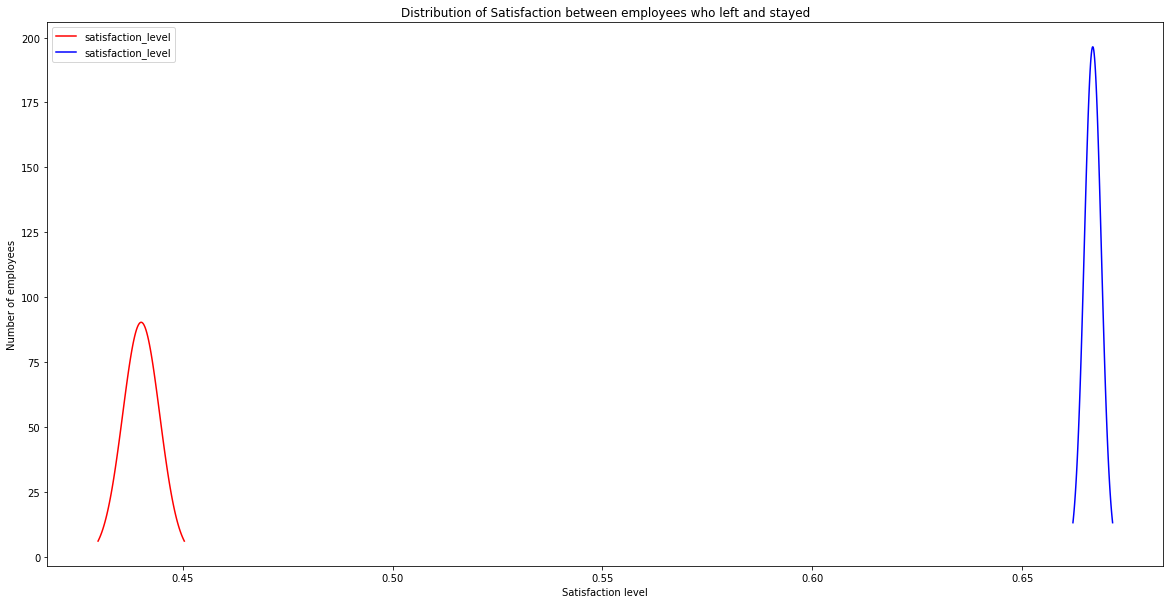

In [248]:
plt.figure(figsize=(20,10))
 
for plot, col, color in zip(ax, [col_left, col_stayed], ['r', 'b']):
    dist = stats.norm(loc=col.mean(), scale=stats.sem(col))
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    plt.plot(x, dist.pdf(x), color=color, label=col.name)
plt.xlabel("Satisfaction level")
plt.ylabel("Number of employees")
plt.legend()
plt.title("Distribution of Satisfaction between employees who left and stayed")

There looks to be a vast difference between the satisfaction of employees that stayed and those that left

#### Question 4
Test the hypothesis that the satisfaction level between each salary group, denoted by k, differs signicantly from the mean.  Namely
$$H_0: \mu_1 - \mu_2 = 0$$
$$H_a: \mu_1 - \mu_2 \ne 0$$

In [244]:
satisfaction_poor = HR_data['satisfaction_level'][HR_data['salary'] == 'low']
satisfaction_medium = HR_data['satisfaction_level'][HR_data['salary'] == 'medium']
satisfaction_rich = HR_data['satisfaction_level'][HR_data['salary'] == 'high']

In [247]:
sat_mean = HR_data['satisfaction_level'].mean()
sat_list = [satisfaction_poor, satisfaction_medium, satisfaction_rich]
salary_level = ['low', 'medium', 'high']
sat_dict = {}
for col, sal in zip(sat_list, salary_level):
    sat_sal = HR_data['satisfaction_level'][HR_data['salary'] == sal]
    sat_dict[sal] = stats.ttest_ind(sat_sal, HR_data['satisfaction_level'], equal_var=False)
sat_dict

{'high': Ttest_indResult(statistic=3.6442559022712162, pvalue=0.00027735999111710589),
 'low': Ttest_indResult(statistic=-3.3529221969998977, pvalue=0.00080172059249811114),
 'medium': Ttest_indResult(statistic=2.4504664985759641, pvalue=0.014280876266337493)}

#### Question 5
How would you interpret your results in part 5?

There is a statistically significant positive correlation between having a high salary and being satisfied.

There is a statistically significant negative correlation between having a high salary and being satisfied.

There is not a statistically significant correlation between medium salaries and satisfaction.

#### Question 6
Generate plots for part 5 as you did in part 3.  What conclusions can you draw from the plot?

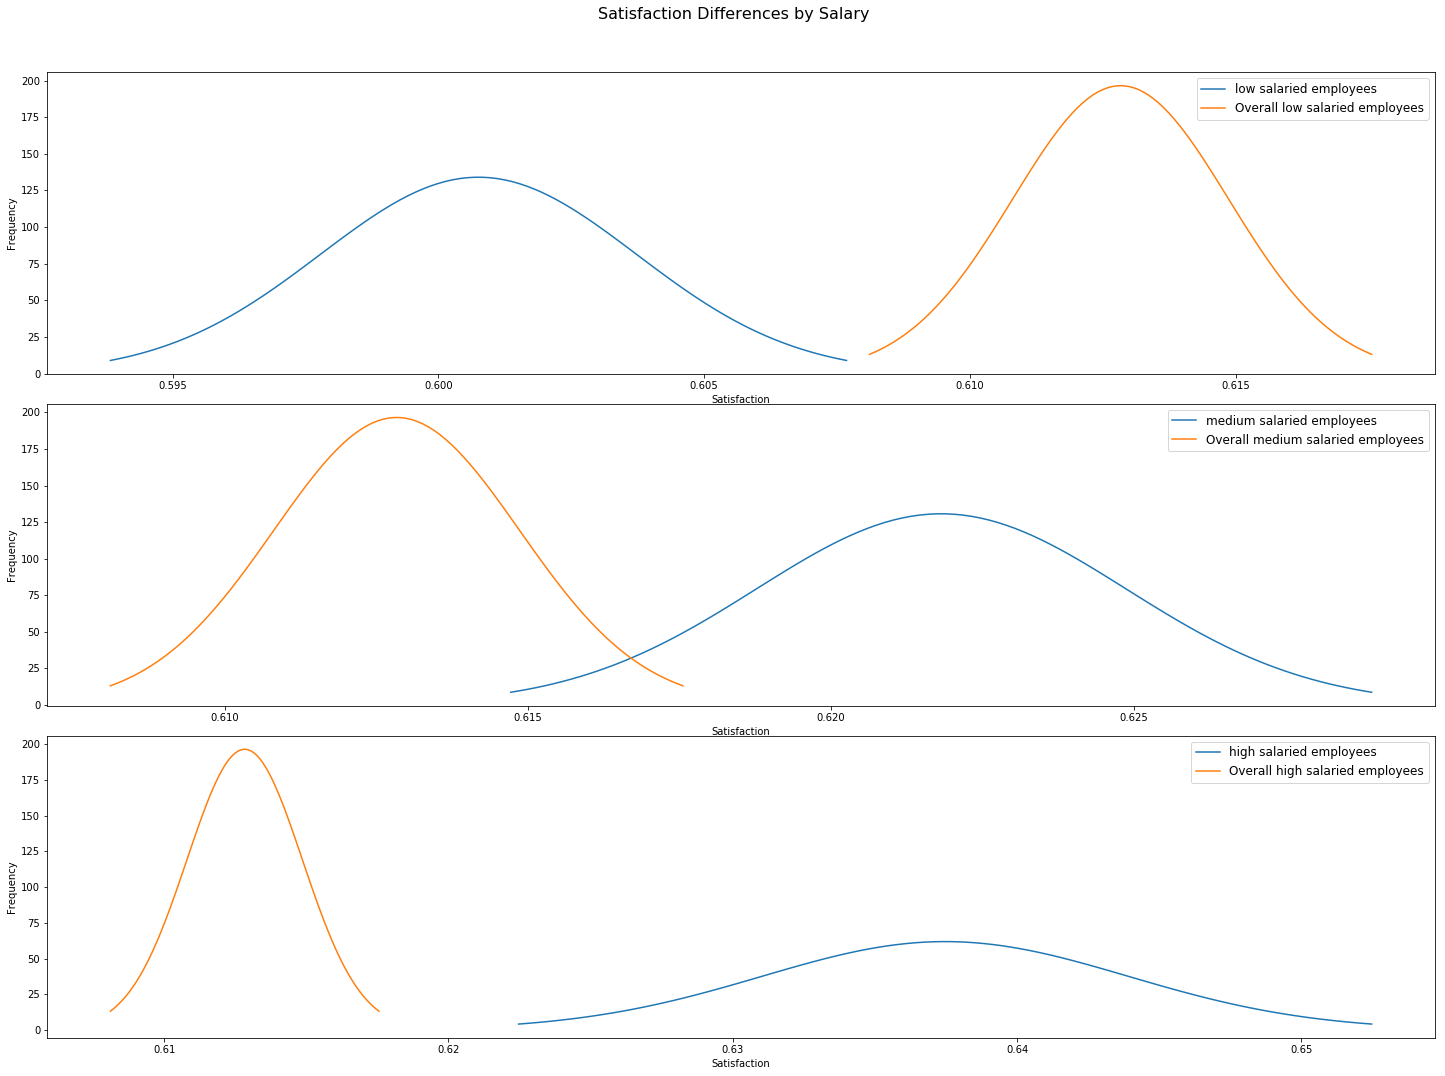

In [308]:
# plot layout configurations
fig, ax = plt.subplots(3, 1, figsize=(20,15))
plt.tight_layout()
fig.suptitle("Satisfaction Differences by Salary", size=16)
fig.subplots_adjust(top=0.92)

for plot, sal, title in zip(ax, sat_list, salary_level):
    # setting norm distributions for salary and mean dsitributions
    dist = stats.norm(loc=sal.mean(), scale=stats.sem(sal))
    norm_dist = stats.norm(loc=HR_data['satisfaction_level'].mean(), scale=stats.sem(HR_data['satisfaction_level']))
    
    # x values for pdfs
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    norm_x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)
    
    # plotting the mean and salary distributions
    plot.plot(x, dist.pdf(x), label=title + ' salaried employees')
    plot.plot(norm_x, norm_dist.pdf(norm_x), label='Overall ' + title + ' salaried employees')
    
    # labelling the plots
    plot.legend(prop={'size':12})
    plot.set_xlabel("Satisfaction")
    plot.set_ylabel("Frequency")

plt.show()

It looks like there is a significant difference between the satisfaction of low and high salaried employees relative to the average employee satisfaction, but potentially not with medium-salaried employees.

#### Question 7
Repeat parts 4-6 on a hypothesis of your choosing.

Testing to see if there is a correlation between time spent at the company and satisfaction with their job:

In [266]:
HR_data['time_spend_company'].mean()

3.498233215547703

In [272]:
jr_employees = HR_data['satisfaction_level'][HR_data['time_spend_company'] < 3.5]
sr_employees = HR_data['satisfaction_level'][HR_data['time_spend_company'] > 3.5]
overall_sat = HR_data['satisfaction_level']

In [273]:
time_list = ['Junior Employees', 'Senior Employees']
employee_list =[jr_employees, sr_employees]

In [275]:
sr_jr_sat = {}
for jr_sr, title in zip(employee_list, time_list):
    sr_jr_sat[title] = stats.ttest_ind(jr_sr, overall_sat, equal_var=False)
sr_jr_sat

{'Junior Employees': Ttest_indResult(statistic=12.841481299234404, pvalue=1.2871783785421248e-37),
 'Senior Employees': Ttest_indResult(statistic=-14.630106048139746, pvalue=7.5002987297936925e-48)}

There is a significant difference between the satisfaction of the junior and senior employees and the mean satisfaction

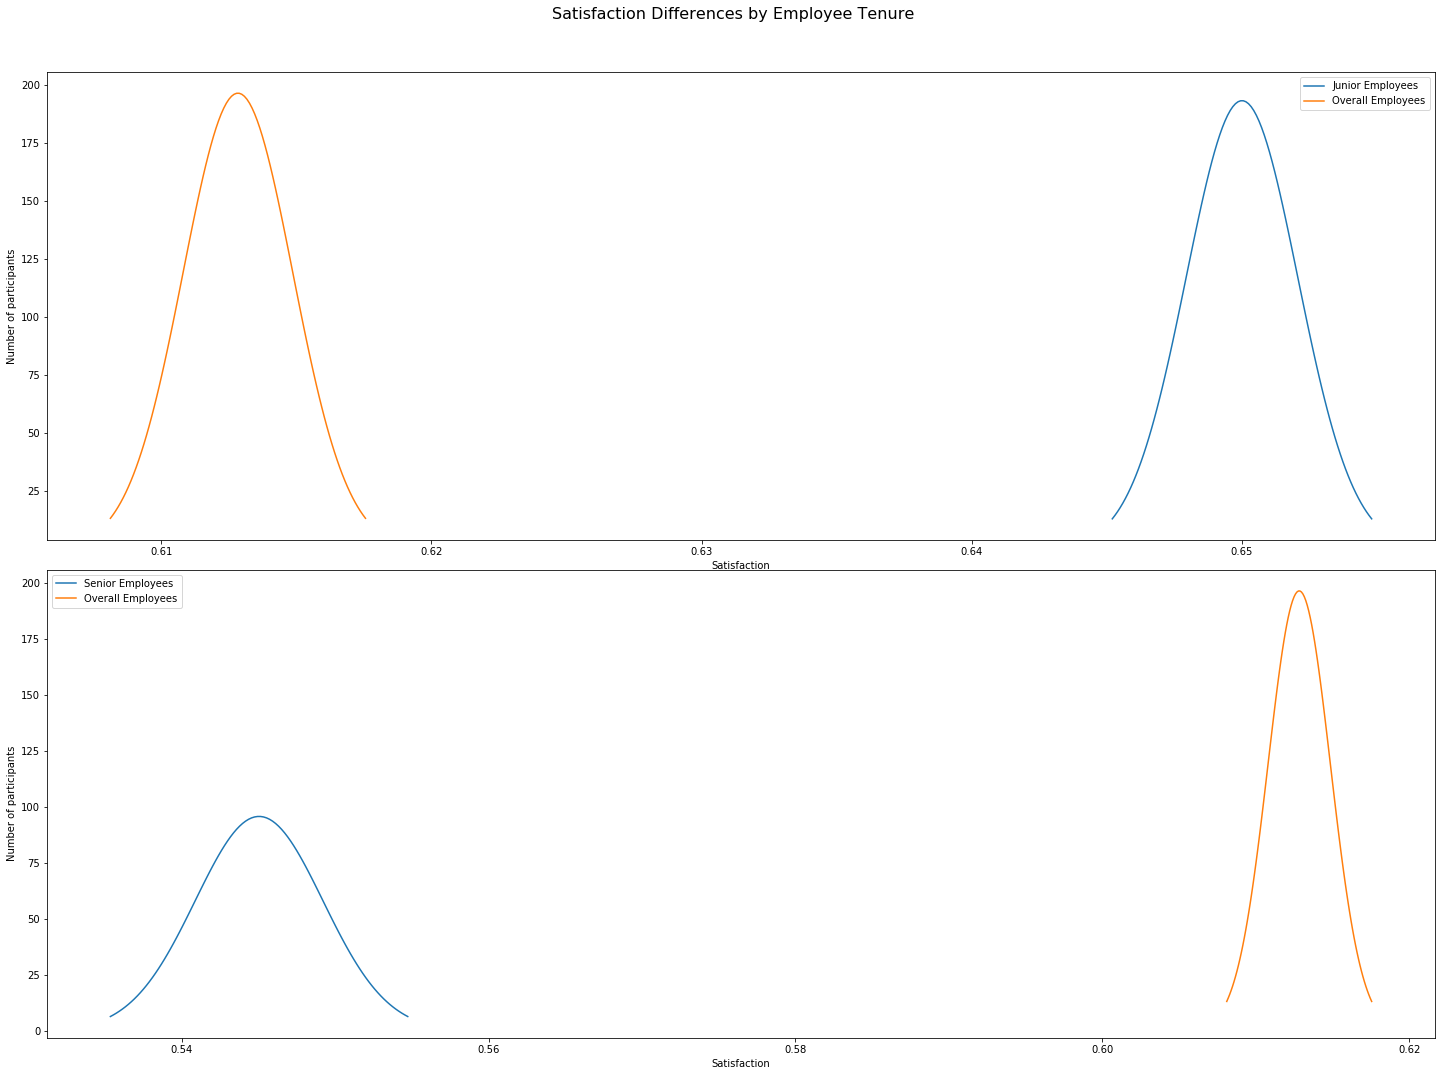

In [278]:
# plot layout configurations
fig, ax = plt.subplots(2, 1, figsize=(20,15))
plt.tight_layout()
fig.suptitle("Satisfaction Differences by Employee Tenure", size=16)
fig.subplots_adjust(top=0.92)

for plot, jr_sr, title in zip(ax, employee_list, time_list):
    # setting norm distributions for salary and mean dsitributions
    dist = stats.norm(loc=jr_sr.mean(), scale=stats.sem(jr_sr))
    norm_dist = stats.norm(loc=overall_sat.mean(), scale=stats.sem(overall_sat))
    
    # x values for pdfs
    x = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
    norm_x = np.linspace(norm_dist.ppf(0.01), norm_dist.ppf(0.99), 100)
    
    # labelling the plots
    overall_title = 'Overall ' + title.split(' ')[1]
    plot.set_xlabel("Satisfaction")
    plot.set_ylabel("Number of participants")
    
    # plotting the mean and salary distributions
    plot.plot(x, dist.pdf(x), label=title)
    plot.plot(norm_x, norm_dist.pdf(norm_x), label=overall_title)
    
    plot.legend()
    
plt.show()

Junior employees are much more satisfied with their position than Senior employees are.

#### Question 8
Recall that Power is the probability of failing to reject the null hypothesis when it is false (thus more power is good).  Compute the power for the hypothesis that the satisfaction level of high paid employees is different than that of medium paid employees using a t distribution.

In [284]:
import statsmodels.stats.api as sm

In [289]:
# establishing the power parameters
effect_size = satisfaction_rich.mean() - satisfaction_medium.mean()
effect_size = effect_size / HR_data.satisfaction_level.std()
nobs1 = len(satisfaction_rich)
alpha = 0.05
r = len(satisfaction_medium) / len(satisfaction_rich)
# calling the power function on a type 1 error rate of 5%
print(sm.TTestIndPower().power(effect_size, nobs1, alpha, ratio=r))

0.52713022099


## Bootstrapping
Bootstrapping is an immensely useful technique in practice.  Very often you may find yourself in a situation where you want to compute a statistic, but lack sufficient data to do so.  Bootstrapping works as a remedy to this problem.

Recall that the bootstrapping algorithm breaks down as follows:
1. Sample n observations with replacement from the observed data resulting in one simulated complete data set. 
1. Take the statistic of the simulated data set
1. Repeat these two steps B times, resulting in B simulated statistics
1. These statistics are approximately drawn from the sampling distribution of the statistic of n observations

In this exercise, you will implement this algorithm on the HR data.

Write a function that can perform boostrapping for the median of a set of n samples in the HR data set.  Test this function on the `satisfaction_level` with `n = 100` and `b = 100` and compare your results to the true median.  Also compute the standard deviation of the bootstrapped median.

In [290]:
import random

In [303]:
sat_lev = HR_data['satisfaction_level']
b = 100
n = 100
pop_size = len(HR_data)
stat_df = pd.DataFrame(columns=['median'])
for i in range(b):
    samples = sat_lev.sample(n=n, replace=True)
    stat_df.loc[i] = [samples.median()]

print("Bootstapped median: {}".format(stat_df['median'].mean()))
print("True median: {}\n".format(sat_lev.median()))

print("Bootstrapped standard deviation: {}".format(stat_df['median'].std()))

Bootstapped median: 0.64115
True median: 0.64

Bootstrapped standard deviation: 0.03466182221395636
